In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/Skiru/Desktop/Python/wk-8_Assignment/metadata/metadata.csv")
df_sample = df.sample(5000, random_state=42)
# Save smaller sample file
df_sample.to_csv("data/metadata_sample.csv", index=False)
df = pd.read_csv("data/metadata_sample.csv", low_memory=False)

# Inspect
print(df.shape)
print(df.info())
print(df.head())

# Missing values
print(df.isnull().sum())


C:\Users\Skiru\AppData\Local\Temp\ipykernel_6944\2340657986.py:4: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Skiru/Desktop/Python/wk-8_Assignment/metadata/metadata.csv")


(5000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          5000 non-null   object 
 1   sha               1777 non-null   object 
 2   source_x          5000 non-null   object 
 3   title             4998 non-null   object 
 4   doi               3153 non-null   object 
 5   pmcid             1825 non-null   object 
 6   pubmed_id         2327 non-null   float64
 7   license           5000 non-null   object 
 8   abstract          3886 non-null   object 
 9   publish_time      4992 non-null   object 
 10  authors           4897 non-null   object 
 11  journal           4553 non-null   object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  2235 non-null   object 
 14  arxiv_id          75 non-null     object 
 15  pdf_json_files    1777 non-null   object 
 16  pmc_json_files    1491 non-null

In [18]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Abstract word count
df['abstract_word_count'] = df['abstract'].astype(str).apply(lambda x: len(x.split()))


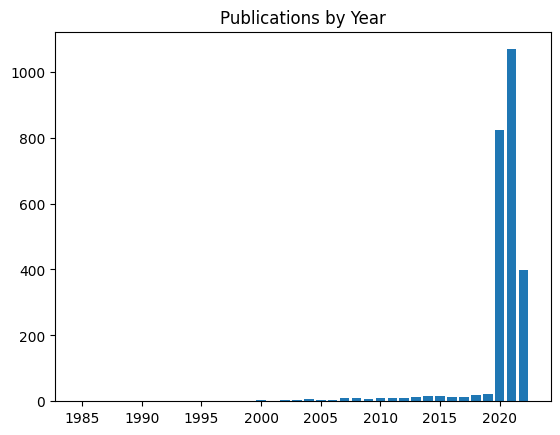

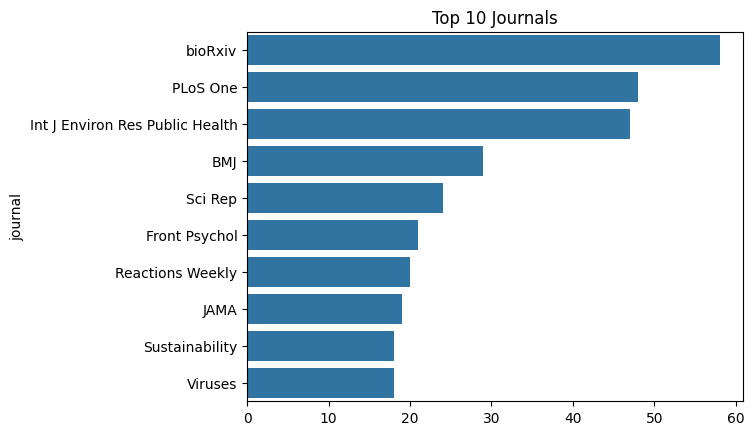

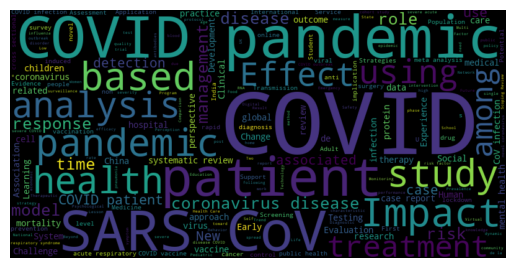

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Papers by year
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(10)
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top 10 Journals")
plt.show()

# Word cloud
from wordcloud import WordCloud
text = " ".join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
